# 2. 머신러닝 맛보기1: 분류문제

## 2-1. 분석 데이터 검토

In [120]:
# 분석데이터(유방암데이터) 불러와서 확인
# Class변수: y값 정상(0), 유방암(1)
import pandas as pd
data = pd.read_csv("../제공자료/breast-cancer-wisconsin.csv")
data.head()

,code,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


In [121]:
# class 변수 비율 확인
data['Class'].value_counts(sort=False)

0    444
1    239
Name: Class, dtype: int64

In [122]:
# 행(케이스 수)와 열(컬럼수) 구조 확인
# shape 괄호 X
data.shape

(683, 11)

## 2-2. 특성(X)과 레이블(y) 나누기

In [123]:
# 특성과 레이블 데이터 나누기: 특성치 데이터셋을 나누는 방법은 다양함
# 방법1: 특성이름으로 특성 데이터셋(X) 나누기
# 컬럼확인
data.columns
X1=data[['Clump_Thickness', 'Cell_Size', 'Cell_Shape', 'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses']]
# 방법2: 특성 위치값으로 특성 데이터셋(X) 나누기
X2=data[data.columns[1:10]]
# 방법3: loc 함수로 특성 데이터셋(X) 나누기 (단, 불러올 특성이 연달아 있어야 함)
X3=data.loc[:, 'Clump_Thickness':'Mitoses']
# 방법4: iloc 사용
X4 = data.iloc[:,1:10]

In [124]:
# 방법 모두 동일한 특성치 데이터셋 나눠진 결과 확인
print(X1.shape)
print(X2.shape)
print(X3.shape)
print(X4.shape)

(683, 9)
(683, 9)
(683, 9)
(683, 9)


In [125]:
# (정답) 레이블 데이터셋 나누기

y = data[['Class']]

In [126]:
# 레이블 데이터셋 행, 열 확인
print(y.shape)



(683, 1)


## 2-3. train-test 데이터셋 나누기

In [127]:
# 학습용 데이터(train)와 테스트용 데이터(test) 구분을 위한 라이브러리 불러오기
# 레이블이 범주형일 경우 straity 옵션 추천
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X1, y, stratify=y, random_state=42)

In [128]:
# 학습데이터와 테스트데이터의 0/1 비율이 유사한지 평균으로 확인(stratity 옵션 적용시 유사)
print(y_train.mean())
print(y_test.mean())

Class    0.349609
dtype: float64
Class    0.350877
dtype: float64


## 2-4. 정규화

In [129]:
# 아진 버전

# 정규화 sklearn.preprocessing
# 민맥스, 표준화
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import StandardScaler

X_scaled_minmax_train = minmax_scale(X_train)

scaler_standard = StandardScaler()
scaler_standard.fit(X_train)
X_scaled_standard_train = scaler_standard.transform(X_train)

In [130]:
print(X_scaled_minmax_train)

[[0.22222222 0.         0.         ... 0.11111111 0.11111111 0.        ]
 [0.         0.         0.         ... 0.22222222 0.         0.        ]
 [0.44444444 0.         0.         ... 0.22222222 0.         0.        ]
 ...
 [1.         0.         0.         ... 0.44444444 0.33333333 0.        ]
 [0.11111111 0.         0.         ... 0.11111111 0.         0.        ]
 [0.         0.         0.         ... 0.11111111 0.         0.        ]]


### 가. train data의 정규화

In [131]:
# 특성치(X)의 단위 정규화를 위한 라이브러리 블러오기(min-max, standard 2가지 비교)
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler_minmax=MinMaxScaler()
scaler_standard=StandardScaler()

In [132]:
# min-max 방법으로 정규화
# 주의!: fit은 학습데이터로 해야, 나중에 test 데이터 정규화시 train 데이터의 최대-최소 기준이 적용됨
scaler_minmax.fit(X_train)
X_scaled_minmax_train=scaler_minmax.transform(X_train)

In [133]:
# standard 방법으로 정규화
# 주의!: fit은 학습데이터로 해야, 나중에 test 데이터 정규화시 train 데이터의 표준화(평균, 표준편차) 기준이 적용됨
scaler_standard.fit(X_train)
X_scaled_standard_train=scaler_standard.transform(X_train)

In [134]:
# min-max 방법으로 정규화한 데이터의 기술통계량 확인
pd.DataFrame(X_scaled_minmax_train).describe()

,0,1,2,3,4,5,6,7,8
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,0.372830,0.231988,0.242839,0.205078,0.241319,0.285590,0.269314,0.199002,0.067491
std,0.317836,0.334781,0.332112,0.319561,0.242541,0.404890,0.265289,0.331503,0.190373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.111111,0.000000,0.000000,0.000000,0.111111,0.000000,0.111111,0.000000,0.000000
50%,0.333333,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000
75%,0.555556,0.361111,0.444444,0.333333,0.333333,0.583333,0.444444,0.222222,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [135]:
# standard 방법으로 정규화한 데이터의 기술통계량 확인
pd.DataFrame(X_scaled_standard_train).describe()


,0,1,2,3,4,5,6,7,8
count,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02
mean,6.938894e-18,6.938894e-18,-2.775558e-17,-2.775558e-17,-4.857226e-17,6.938894e-18,-2.081668e-17,-2.775558e-17,-1.734723e-18
std,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00
min,-1.174173e+00,-6.936309e-01,-7.319088e-01,-6.423777e-01,-9.959361e-01,-7.060427e-01,-1.016165e+00,-6.008881e-01,-3.548677e-01
25%,-8.242452e-01,-6.936309e-01,-7.319088e-01,-6.423777e-01,-5.373756e-01,-7.060427e-01,-5.969255e-01,-6.008881e-01,-3.548677e-01
50%,-1.243886e-01,-6.936309e-01,-7.319088e-01,-6.423777e-01,-5.373756e-01,-7.060427e-01,-1.776856e-01,-6.008881e-01,-3.548677e-01
75%,5.754680e-01,3.860715e-01,6.076347e-01,4.017410e-01,3.797454e-01,7.360871e-01,6.607941e-01,7.011454e-02,-3.548677e-01
max,1.975181e+00,2.296314e+00,2.282064e+00,2.489978e+00,3.131108e+00,1.766180e+00,2.756993e+00,2.418624e+00,4.903108e+00


- 민맥스로 정규화 : 최소0 최대 1
- 표준화로 졍규화 : 평균이 0 표준편차 1


### 나. test data의 정규화

In [136]:
# test 데이터에도 정규화 적용 및 데이터 확인: min-max 방법
X_scaled_minmax_test=scaler_minmax.transform(X_test)
pd.DataFrame(X_scaled_minmax_test).describe()


,0,1,2,3,4,5,6,7,8
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,0.411306,0.259909,0.256010,0.198181,0.269006,0.274204,0.278752,0.233918,0.065627
std,0.298847,0.357544,0.332700,0.315307,0.259557,0.405891,0.292578,0.360958,0.199372
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000
50%,0.444444,0.000000,0.111111,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000
75%,0.555556,0.444444,0.444444,0.222222,0.388889,0.444444,0.444444,0.388889,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [137]:
# test 데이터에도 정규화 적용 및 데이터 확인: standard 방법
X_scaled_standard_test=scaler_standard.transform(X_test)
pd.DataFrame(X_scaled_standard_test).describe()

,0,1,2,3,4,5,6,7,8
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,0.121175,0.083483,0.039700,-0.021605,0.114263,-0.028149,0.035612,0.105430,-0.009802
std,0.941174,1.069038,1.002747,0.987654,1.071204,1.003453,1.103943,1.089918,1.048292
min,-1.174173,-0.693631,-0.731909,-0.642378,-0.995936,-0.706043,-1.016165,-0.600888,-0.354868
25%,-0.474317,-0.693631,-0.731909,-0.642378,-0.537376,-0.706043,-1.016165,-0.600888,-0.354868
50%,0.225540,-0.693631,-0.397023,-0.642378,-0.537376,-0.706043,-0.177686,-0.600888,-0.354868
75%,0.575468,0.635234,0.607635,0.053701,0.609026,0.392723,0.660794,0.573367,-0.354868
max,1.975181,2.296314,2.282064,2.489978,3.131108,1.766180,2.756993,2.418624,4.903108


## 2-5. 모델 학습

In [138]:
# 모델 부를 때 sklearn.모델종류 헷갈리지말자

# ML 알고리즘 모듈 불러오기 및 학습데이터에 적용(LogisticRegression)
# 여기서는 min-max 정규화 데이터로 분석
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_scaled_minmax_train, y_train)

C:\Users\aj878\anaconda3\envs\r_web_crawling\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [139]:
# 분류 예측 결과(0,1)을 'pred_train'에 저장(할당), score로 정확도(accuracy) 확인
pred_train=model.predict(X_scaled_minmax_train)
model.score(X_scaled_minmax_train, y_train)

0.97265625

In [140]:
# 테스트 데이터에 학습데이터의 모델 적용, 'pred_test'에 저장(할당), score로 정확도(accuracy) 확인
pred_test=model.predict(X_scaled_minmax_test)
model.score(X_scaled_minmax_test, y_test)

0.9590643274853801

In [141]:
# 학습데이터의 혼동행렬 보기(정분류, 오분류 교차표)
from sklearn.metrics import confusion_matrix
confusion_train=confusion_matrix(y_train, pred_train)
print("훈련데이터 오차행렬:\n", confusion_train)

훈련데이터 오차행렬:
 [[328   5]
 [  9 170]]


In [142]:
# 훈련 데이터의 평가지표 상세 확인
from sklearn.metrics import classification_report
cfreport_train=classification_report(y_train, pred_train)
print("분류예측 레포트:\n", cfreport_train)

분류예측 레포트:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       333
           1       0.97      0.95      0.96       179

    accuracy                           0.97       512
   macro avg       0.97      0.97      0.97       512
weighted avg       0.97      0.97      0.97       512



In [143]:
# 테스트 데이터의 평가지표 상세 확인
from sklearn.metrics import classification_report
cfreport_test=classification_report(y_test, pred_test)
print("분류예측 레포트:\n", cfreport_test)

분류예측 레포트:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       111
           1       0.92      0.97      0.94        60

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [144]:

# ROC 지표 산출을 위한 라이브러리 및 산식
# 테스트 데이터를 이용해 구한다.
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, model.decision_function(X_scaled_minmax_test))
roc_auc = metrics.roc_auc_score(y_test, model.decision_function(X_scaled_minmax_test))
roc_auc

0.9923423423423423

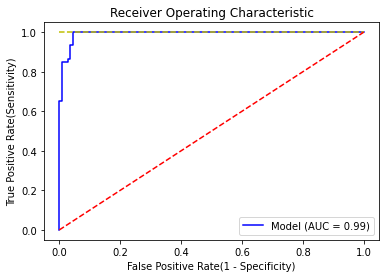

In [145]:
# ROC Curve 그리기
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')

plt.plot(false_positive_rate, true_positive_rate, 'b', label='Model (AUC = %0.2f)'% roc_auc)
plt.plot([0,1],[1,1],'y--')
plt.plot([0,1],[0,1],'r--')

plt.legend(loc='lower right')
plt.show()

# 직선과 ROC 사이 면적이 넓을수록 좋은 예측모델

## 2-6. 예측값 병합 및 저장

In [147]:
# 학습데이터의 예측범주, 예측확률 컬럼을 생성하여 'y_train' 데이터셋에 추가
prob_train=model.predict_proba(X_scaled_minmax_train)
y_train['y_pred']=pred_train
y_train[['y_prob0', 'y_prob1']]=prob_train
y_train

,Class,y_pred,y_prob0,y_prob1
131,0,0,0.981014,0.018986
6,0,0,0.768191,0.231809
0,0,0,0.966431,0.033569
269,0,0,0.988880,0.011120
56,1,1,0.203161,0.796839
...,...,...,...,...
515,1,1,0.021270,0.978730
216,1,0,0.895961,0.104039
312,1,1,0.113440,0.886560
11,0,0,0.987405,0.012595


In [149]:
# 테스트 데이터의 예측범주, 예측확률 컬럼을 생성하여 'y_test' 데이터셋에 추가
prob_test=model.predict_proba(X_scaled_minmax_test)
y_test['y_pred']=pred_test
y_test[['y_prob0', 'y_prob1']]=prob_test
y_test

,Class,y_pred,y_prob0,y_prob1
541,0,0,0.955893,0.044107
549,0,0,0.970887,0.029113
318,0,0,0.943572,0.056428
183,0,0,0.979370,0.020630
478,1,1,0.001305,0.998695
...,...,...,...,...
425,1,1,0.006201,0.993799
314,1,1,0.067440,0.932560
15,1,1,0.436887,0.563113
510,0,0,0.983410,0.016590


In [156]:
# 테스트 데이터의 특성치(X_test)와 레이블 및 예측치(y_test)를 병합
Total_test=pd.concat([X_test, y_test], axis=1)
Total_test


,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class,y_pred,y_prob0,y_prob1
541,5,2,2,2,1,1,2,1,1,0,0,0.955893,0.044107
549,4,1,1,1,2,1,3,2,1,0,0,0.970887,0.029113
318,5,2,2,2,2,1,2,2,1,0,0,0.943572,0.056428
183,1,2,3,1,2,1,3,1,1,0,0,0.979370,0.020630
478,5,10,10,10,6,10,6,5,2,1,1,0.001305,0.998695
...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,10,4,3,10,4,10,10,1,1,1,1,0.006201,0.993799
314,8,10,3,2,6,4,3,10,1,1,1,0.067440,0.932560
15,7,4,6,4,6,1,4,3,1,1,1,0.436887,0.563113
510,3,1,1,2,2,1,1,1,1,0,0,0.983410,0.016590


In [162]:
# csv파일로 내보내기 및 저장
Total_test.to_csv("수험번호_3부_맛보기_분류문제.csv", index = False)